<a href="https://colab.research.google.com/github/AndreMoreira00/Tratamento-de-Dados-Desbalanceados/blob/main/Tratamento_de_dados_Desbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados Desbalanceados

In [59]:
import pandas as pd

In [84]:
base_census = pd.read_csv('census.csv')

In [61]:
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [62]:
import numpy as np

In [63]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

<Axes: xlabel='income', ylabel='count'>

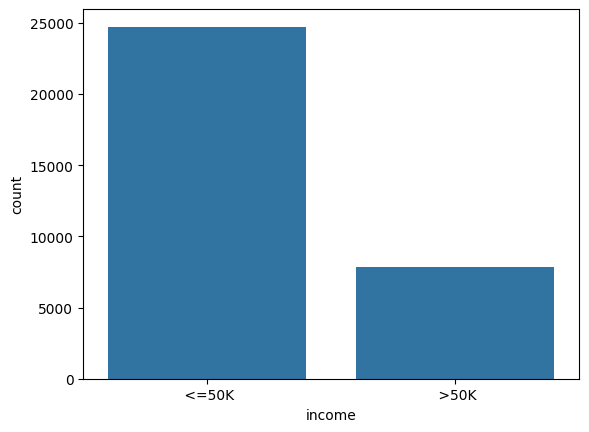

In [64]:
import seaborn as sns
sns.countplot(x = base_census['income'])

In [85]:
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [86]:
Y_census = base_census.iloc[:, 14].values
Y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [87]:
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [88]:
X_census[:, 1] = label_encoder_workclass.fit_transform(X_census[:, 1])
X_census[:, 3] = label_encoder_education.fit_transform(X_census[:, 3])
X_census[:, 5] = label_encoder_marital.fit_transform(X_census[:, 5])
X_census[:, 6] = label_encoder_occupation.fit_transform(X_census[:, 6])
X_census[:, 7] = label_encoder_relationship.fit_transform(X_census[:, 7])
X_census[:, 8] = label_encoder_race.fit_transform(X_census[:, 8])
X_census[:, 9] = label_encoder_sex.fit_transform(X_census[:, 9])
X_census[:, 13] = label_encoder_country.fit_transform(X_census[:, 13])

In [69]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

# Subamostragem com Tomenk Links

In [70]:
from imblearn.under_sampling import TomekLinks

In [71]:
tl = TomekLinks(sampling_strategy='all')

In [72]:
X_under, Y_under = tl.fit_resample(X_census, Y_census)

In [73]:
X_under.shape, Y_under.shape

((27759, 14), (27759,))

In [74]:
np.unique(Y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [75]:
np.unique(Y_under, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([22319,  5440]))

In [76]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot_encoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')
X_census = one_hot_encoder.fit_transform(X_census).toarray()
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [77]:
X_census.shape

(32561, 108)

In [78]:
from sklearn.model_selection import train_test_split
X_census_treinamento_under, X_census_teste_under, Y_census_treinamento_under, Y_census_teste_under = train_test_split(X_census, Y_census, test_size=0.15, random_state=0)
X_census_treinamento_under.shape, X_census_teste_under.shape

((27676, 108), (4885, 108))

In [79]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=100)
random_forest_census.fit(X_census_treinamento_under, Y_census_treinamento_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [80]:
from sklearn.metrics import accuracy_score
previsoes = random_forest_census.predict(X_census_teste_under)
accuracy_score(Y_census_teste_under, previsoes)

0.8583418628454452

# Subreamostragem com SMOTE

In [81]:
from imblearn.over_sampling import SMOTE

In [83]:
smote = SMOTE(sampling_strategy='minority')

In [89]:
X_ouver, Y_ouver = smote.fit_resample(X_census, Y_census)

In [90]:
X_ouver.shape

(49440, 14)

In [92]:
np.unique(Y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [93]:
np.unique(Y_ouver, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720]))

In [94]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot_encoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')
X_census = one_hot_encoder.fit_transform(X_ouver).toarray()
X_census

array([[   0.        ,    0.        ,    0.        , ..., 2174.        ,
           0.        ,   40.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   13.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   40.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   41.58420744],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   42.4606604 ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   49.94325274]])

In [96]:
from sklearn.model_selection import train_test_split
X_census_treinamento_ouver, X_census_teste_ouver, Y_census_treinamento_ouver, Y_census_teste_ouver = train_test_split(X_ouver, Y_ouver, test_size=0.15, random_state=0)
X_census_treinamento_ouver.shape, X_census_teste_ouver.shape

((42024, 14), (7416, 14))

In [97]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=100)
random_forest_census.fit(X_census_treinamento_ouver, Y_census_treinamento_ouver)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [98]:
from sklearn.metrics import accuracy_score
previsoes = random_forest_census.predict(X_census_teste_ouver)
accuracy_score(Y_census_teste_ouver, previsoes)

0.9096548004314995